<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/keras/cifar10%20d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
print(tf.__version__)

2.2.0-rc3


In [0]:
cifar10 = tf.keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 16s 0us/step


In [4]:
len(train_images),  len(train_labels), len(test_images), len(test_labels)

(50000, 50000, 10000, 10000)

In [5]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
'''
train_images = train_images/255
test_images = test_images/255

'''

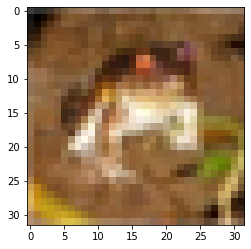

In [7]:
plt.imshow(train_images[0])

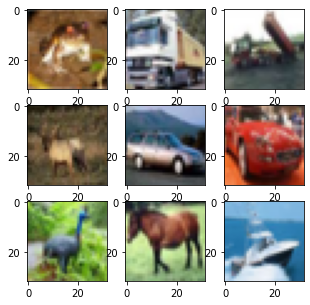

In [9]:
'''
class_names = ['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i])
  #plt.xlabel(class_names[train_labels[i]])


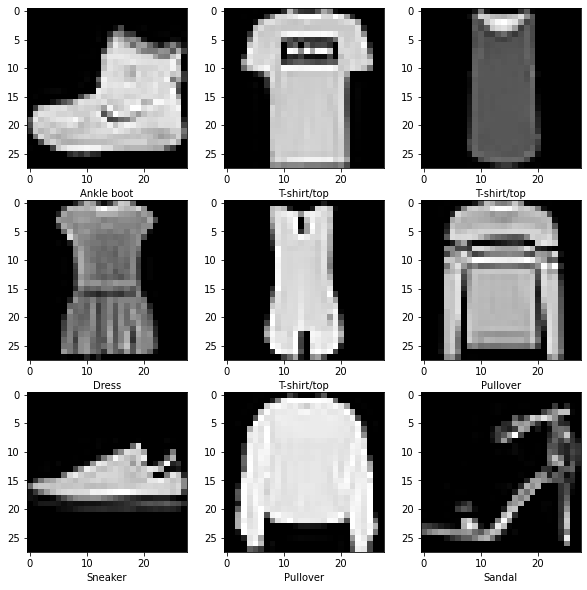

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i], cmap= 'gray')
  plt.xlabel(class_names[train_labels[i]])


In [0]:
from sklearn.model_selection import train_test_split

training_images, validating_images, training_labels, validating_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 12345)

In [11]:
len(training_images),  len(training_labels), len(validating_images), len(validating_labels), len(test_images), len(test_labels)

(40000, 40000, 10000, 10000, 10000, 10000)

In [13]:
print(training_images.shape)
print(training_labels.shape)
print(validating_images.shape)
print(test_images.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
cnn_model = models.Sequential()


cnn_model.add(Conv2D(64, (5, 5), input_shape = (32,32,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))
'''
cnn_model.add(Conv2D(82, (5, 5), input_shape = (28,28,1), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(60, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))
'''
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 130, activation = 'relu'))
cnn_model.add(Dense(units = 80, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [15]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 130)               1630850   
_________________________________________________________________
dense_1 (Dense)              (None, 80)                10480     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8

In [0]:
#optm = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [0]:
# * unpack the tuple
training_images = training_images.reshape(training_images.shape[0], *(28, 28, 1))
test_images = test_images.reshape(test_images.shape[0], *(28, 28, 1))
validating_images = validating_images.reshape(validating_images.shape[0], *(28, 28, 1))

In [17]:
epochs = 70

history = cnn_model.fit(training_images, training_labels, batch_size = 100, epochs = epochs,
                        verbose = 1, validation_data = (validating_images, validating_labels))
#history = cnn_model.fit(X_train, y_train, batch_size = 100, epochs = epochs,
 #                       verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/70
400/400 [==============================] - 3s 7ms/step - loss: 3.3447 - accuracy: 0.2999 - val_loss: 1.7529 - val_accuracy: 0.3774
Epoch 2/70
400/400 [==============================] - 3s 7ms/step - loss: 1.6368 - accuracy: 0.4138 - val_loss: 1.5742 - val_accuracy: 0.4366
Epoch 3/70
400/400 [==============================] - 3s 7ms/step - loss: 1.5092 - accuracy: 0.4642 - val_loss: 1.5645 - val_accuracy: 0.4473
Epoch 4/70
400/400 [==============================] - 3s 7ms/step - loss: 1.3924 - accuracy: 0.5058 - val_loss: 1.5051 - val_accuracy: 0.4668
Epoch 5/70
400/400 [==============================] - 3s 7ms/step - loss: 1.2984 - accuracy: 0.5392 - val_loss: 1.5019 - val_accuracy: 0.4908
Epoch 6/70
400/400 [==============================] - 3s 7ms/step - loss: 1.2111 - accuracy: 0.5708 - val_loss: 1.5166 - val_accuracy: 0.4809
Epoch 7/70
400/400 [==============================] - 3s 7ms/step - loss: 1.1406 - accuracy: 0.5978 - val_loss: 1.6514 - val_accuracy: 0.4662
Epoch 

In [0]:
evaluation = cnn_model.evaluate(test_images, test_labels)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2414 - accuracy: 0.9169
Test Accuracy : 0.917


In [0]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(test_images)
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

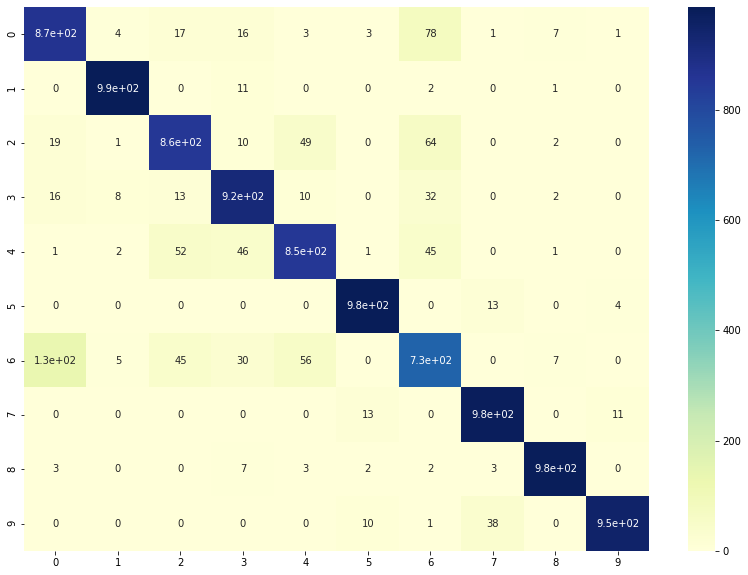

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, cmap ="YlGnBu", annot= True )
# Sum the diagonal element to get the total true correct values

In [0]:
cm

array([[870,   4,  17,  16,   3,   3,  78,   1,   7,   1],
       [  0, 986,   0,  11,   0,   0,   2,   0,   1,   0],
       [ 19,   1, 855,  10,  49,   0,  64,   0,   2,   0],
       [ 16,   8,  13, 919,  10,   0,  32,   0,   2,   0],
       [  1,   2,  52,  46, 852,   1,  45,   0,   1,   0],
       [  0,   0,   0,   0,   0, 983,   0,  13,   0,   4],
       [131,   5,  45,  30,  56,   0, 726,   0,   7,   0],
       [  0,   0,   0,   0,   0,  13,   0, 976,   0,  11],
       [  3,   0,   0,   7,   3,   2,   2,   3, 980,   0],
       [  0,   0,   0,   0,   0,  10,   1,  38,   0, 951]])

In [0]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(test_labels, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.87      0.85      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.87      0.85      0.86      1000
     Class 3       0.88      0.92      0.90      1000
     Class 4       0.88      0.85      0.86      1000
     Class 5       0.97      0.98      0.98      1000
     Class 6       0.76      0.73      0.74      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



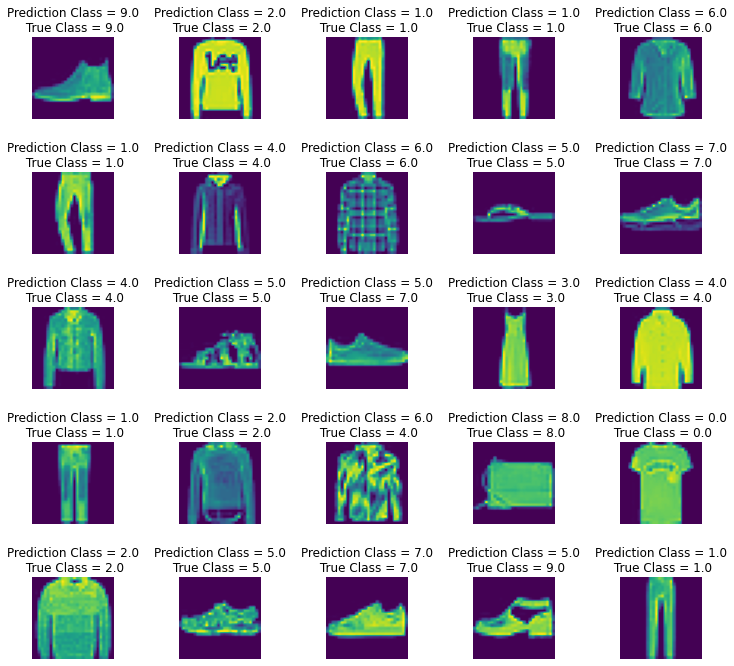

In [0]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(test_images[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {test_labels[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.8)